<a href="https://colab.research.google.com/github/Janhvi-Pandya/Janhvi-Pandya.github.io/blob/master/Titanic_Kaggle_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Shape of the data (rows, columns)
print("Train shape:", train.shape)
print("Test shape:", test.shape)

# List all columns
print("Columns:", train.columns.tolist())


Train shape: (891, 12)
Test shape: (418, 11)
Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [ ]:

train.isnull().sum().sort_values(ascending=False)


,0
Cabin,687
Age,177
Embarked,2
PassengerId,0
Name,0
Pclass,0
Survived,0
Sex,0
Parch,0
SibSp,0


In [ ]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#  Fill missing Age values with median (no warning)
train['Age'] = train['Age'].fillna(train['Age'].median())
test['Age'] = test['Age'].fillna(test['Age'].median())

# Drop 'Cabin' column (too many missing values)
train = train.drop('Cabin', axis=1)
test = test.drop('Cabin', axis=1)

#  Fill missing Embarked values with the most common port (mode)
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

#  Fill the single missing Fare value in test set with median
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

#  Confirm all missing values are handled
print("Missing values in train set:\n", train.isnull().sum())
print("\nMissing values in test set:\n", test.isnull().sum())


Missing values in train set:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Missing values in test set:
 PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


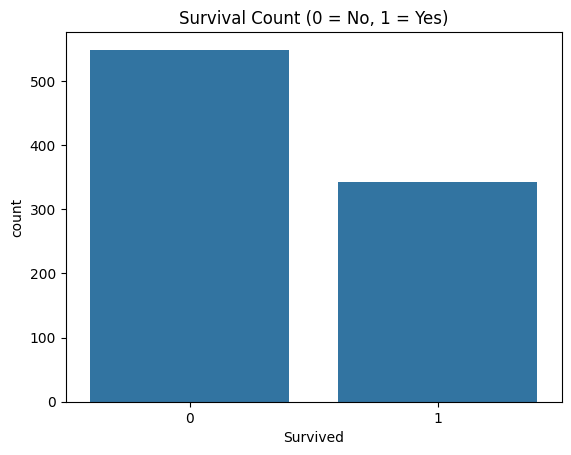

In [ ]:
sns.countplot(x='Survived', data=train)
plt.title("Survival Count (0 = No, 1 = Yes)")
plt.show()

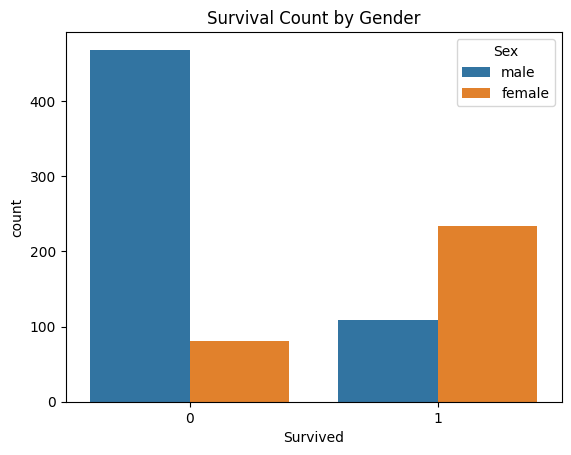

In [ ]:
sns.countplot(x='Survived', hue='Sex', data=train)
plt.title("Survival Count by Gender")
plt.show()

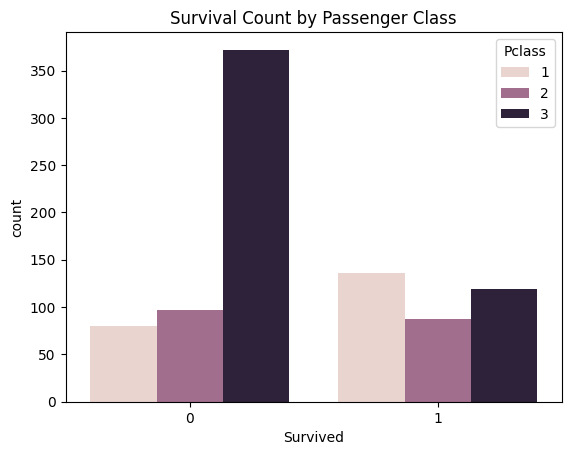

In [ ]:
sns.countplot(x='Survived', hue='Pclass', data=train)
plt.title("Survival Count by Passenger Class")
plt.show()

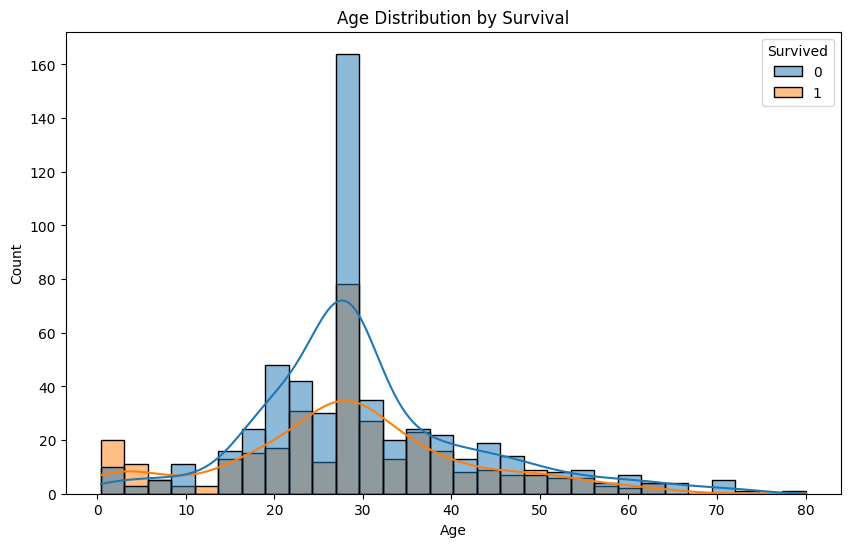

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train, x='Age', hue='Survived', bins=30, kde=True)
plt.title("Age Distribution by Survival")
plt.show()


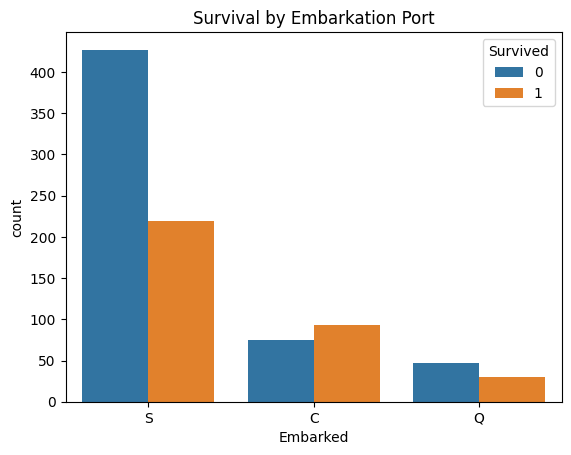

In [ ]:
sns.countplot(x='Embarked', hue='Survived', data=train)
plt.title("Survival by Embarkation Port")
plt.show()

In [ ]:
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})


In [ ]:
embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)


In [ ]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1


In [ ]:
X_train = train.drop(['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)
y_train = train['Survived']

X_test = test.drop(['PassengerId', 'Name', 'Ticket'], axis=1)


In [ ]:
print("Train features:\n", X_train.head())
print("\nTrain labels:\n", y_train.head())


Train features:
    Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  FamilySize
0       3    0  22.0      1      0   7.2500         0           2
1       1    1  38.0      1      0  71.2833         1           2
2       3    1  26.0      0      0   7.9250         0           1
3       1    1  35.0      1      0  53.1000         0           2
4       3    0  35.0      0      0   8.0500         0           1

Train labels:
 0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
# Train Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_split, y_train_split)

# Predict on validation set
y_pred_logreg = logreg.predict(X_val)

# Evaluate
print("Logistic Regression Accuracy:", accuracy_score(y_val, y_pred_logreg))
print(confusion_matrix(y_val, y_pred_logreg))
print(classification_report(y_val, y_pred_logreg))

In [ ]:
logreg = LogisticRegression(max_iter=1000)  # Create model
logreg.fit(X_train_split, y_train_split)    # Train model


LogisticRegression(max_iter=1000)

In [ ]:
y_pred_logreg = logreg.predict(X_val)       # Make predictions


In [ ]:
print(accuracy_score(y_val, y_pred_logreg))


0.7988826815642458


In [ ]:
print(confusion_matrix(y_val, y_pred_logreg))


[[89 16]
 [20 54]]


In [ ]:
print(classification_report(y_val, y_pred_logreg))


              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



### Logistic Regression Model: Interpretation & Explanation

Logistic Regression is a binary classification model that predicts the probability of an event occurring—in our case, whether a passenger survived (1) or not (0). It outputs a probability score, and if that score is above a certain threshold (commonly 0.5), the model classifies it as "survived".

We trained a logistic regression model on the Titanic dataset and evaluated it on a validation set. The model achieved an accuracy of approximately 80%. This means the model correctly predicted survival outcomes for about 80% of passengers in the validation set.

The confusion matrix for the predictions was:

[[89 16]  
 [20 54]]

Here’s what this means:
- 89 passengers who actually died were correctly predicted as not survived (true negatives).
- 54 passengers who actually survived were correctly predicted as survived (true positives).
- 16 passengers were predicted to have survived but actually didn’t (false positives).
- 20 passengers were predicted to have died but actually survived (false negatives).

These values show us not just overall performance, but **where** the model makes mistakes. It struggles slightly more with identifying survivors (missed 20) than identifying deaths.

The classification report provides a deeper analysis:
- For class 0 (not survived), precision was 0.82 and recall was 0.85.
- For class 1 (survived), precision was 0.77 and recall was 0.73.
- F1-score for survivors was 0.75, indicating a moderate balance between precision and recall.

Precision tells us: “Out of all the times the model predicted someone would survive, how often was it right?”  
Recall tells us: “Out of all the actual survivors, how many did the model correctly identify?”

The model had higher precision than recall for survivors, meaning it was cautious about predicting survival—it only predicted it when it was confident, which means fewer false alarms, but also more missed actual survivors.

The macro and weighted average scores were both around 0.79–0.80. Macro average treats both classes equally, while weighted average accounts for class imbalance (more people died than survived in the Titanic dataset).

In summary, our logistic regression model performs quite well as a baseline. It is especially good at predicting non-survivors and moderately effective at catching true survivors. There is room for improvement, particularly in recall for the survivor class. This could potentially be addressed using more complex models (e.g., decision trees, random forests) or better feature engineering.


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree model (with limited depth to prevent overfitting)
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train_split, y_train_split)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
y_pred_tree = tree.predict(X_val)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
print("Decision Tree Accuracy:", accuracy_score(y_val, y_pred_tree))

# Confusion Matrix
print(confusion_matrix(y_val, y_pred_tree))

# Classification Report
print(classification_report(y_val, y_pred_tree))


Decision Tree Accuracy: 0.7988826815642458
[[96  9]
 [27 47]]
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       105
           1       0.84      0.64      0.72        74

    accuracy                           0.80       179
   macro avg       0.81      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179



###  Decision Tree Classifier – Model Interpretation

We trained a Decision Tree Classifier with a maximum depth of 4 to avoid overfitting. The model was evaluated on a 20% validation set, and the results were as follows:

The model achieved an accuracy of **~79.89%**, which means it correctly predicted survival status for about 80% of passengers in the validation data. This is similar to the logistic regression model, but with different strengths.

The confusion matrix was:

[[96  9]  
 [27 47]]

This tells us:
-  **96 passengers** who died were correctly predicted as such (true negatives).
-  **47 passengers** who survived were correctly predicted (true positives).
-  **9 passengers** were wrongly predicted as survived when they died (false positives).
-  **27 passengers** were wrongly predicted as died when they actually survived (false negatives).

The classification report breaks it down further:
- For class 0 (not survived), precision = 0.78, recall = 0.91, and F1-score = 0.84. This means the model is very good at detecting people who died — it caught 91% of them.
- For class 1 (survived), precision = 0.84, recall = 0.64, and F1-score = 0.72. This means that when it predicts survival, it's usually correct (84% precision), but it **misses many actual survivors** (only 64% recall).

So, compared to logistic regression:
- The **decision tree is more confident when it predicts someone survived (higher precision)**.
- But it **misses more actual survivors than logistic regression** (lower recall).
- It’s **more aggressive in declaring deaths** (high recall for class 0).

The macro and weighted averages show balanced performance:
- Macro avg F1 = 0.78 (unweighted average across both classes)
- Weighted avg F1 = 0.79 (weighted by class size)

In summary, the decision tree performs similarly to logistic regression in terms of overall accuracy but has **different trade-offs**. It is slightly better at catching those who died and more confident in predicting survival — but less effective at identifying all survivors.

This suggests that either model is a solid baseline, and you could potentially improve performance by trying **ensemble methods** like Random Forest or Gradient Boosting.
